### Finding ***Initial*** and ***Refined*** Best Fitness score with **Acuracy Improvement.**

In [2]:
!pip install matplotlib deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.8 MB/s eta 0:00:00


Running GA without refinements...
gen	nevals	avg    	min    
0  	300   	561.824	5.38943
1  	213   	539.974	5.38943
2  	243   	530.748	2.29506
3  	232   	519.598	2.04507
4  	233   	519.672	3.42398
5  	218   	512.547	4.45488
6  	213   	510.433	2.69435
7  	233   	508.29 	0.767834
8  	219   	500.485	2.83522 
9  	209   	489.245	1.29413 
10 	224   	485.283	2.18082 
11 	230   	491.019	1.86684 
12 	230   	489.565	1.51836 
13 	217   	484.787	0.726382
14 	231   	485.303	2.89385 
15 	250   	471.115	5.92299 
16 	238   	467.394	2.54828 
17 	236   	455.388	2.90033 
18 	225   	449.265	2.90033 
19 	225   	438.806	2.13317 
20 	209   	431.272	2.90033 
21 	232   	429.69 	4.2534  
22 	237   	427.725	2.96129 
23 	217   	428.37 	3.87552 
24 	227   	421.375	3.70432 
25 	246   	426.171	2.18832 
26 	233   	414.967	0.344157
27 	219   	410.956	3.58736 
28 	229   	404.733	3.08052 
29 	223   	397.831	1.54838 
30 	238   	393.881	1.43784 
31 	225   	385.804	0.740091
32 	221   	380.099	1.38643 
33 	243   	374.204	1.7

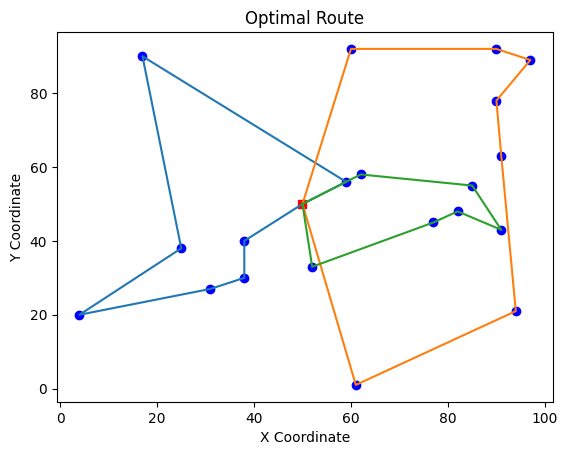

Running GA with refinements...
gen	nevals	avg    	min    
0  	300   	561.824	5.38943
1  	280   	526.422	5.38943
2  	265   	503.896	5.38943
3  	277   	488.897	5.38943
4  	269   	476.132	5.38943
5  	267   	466.726	5.38943
6  	270   	459.315	5.38943
7  	276   	453.046	8.74855
8  	269   	443.753	8.74855
9  	271   	435.101	4.78411
10 	274   	429.958	4.78411
11 	267   	422.982	4.78411
12 	269   	414.947	4.78411
13 	282   	407.302	4.78411
14 	270   	399.998	4.78411
15 	272   	390.958	4.78411
16 	272   	384.811	4.78411
17 	259   	380.2  	10.3511
18 	272   	373.477	8.27538
19 	270   	366.525	8.27538
20 	267   	361.07 	17.6842
21 	262   	354.471	17.6842
22 	276   	342.989	17.6842
23 	280   	329.44 	18.9423
24 	268   	322.1  	18.7528
25 	271   	317.08 	18.5038
26 	272   	312.014	18.5038
27 	276   	308.283	15.106 
28 	272   	303.648	23.1472
29 	278   	298.612	22.9   
30 	266   	294.81 	23.1472
31 	278   	293.723	16.0789
32 	277   	292.603	15.7412
33 	268   	290.475	15.7412
34 	268   	286.494	15.74

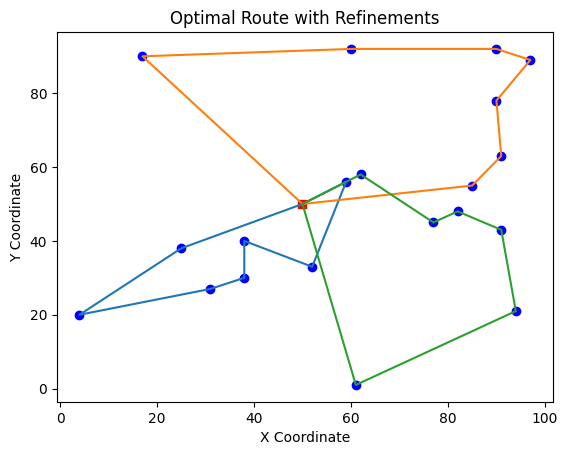

Initial Best Fitness: (558.0367631511714, 54.088821306754475)
Refined Best Fitness: (518.7624403918007, 23.705728488397945)
Accuracy Improvement: 7.04%
Convergence Rate Improvement: 56.17%


In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# Task 1 - Define the number of locations and vehicles
num_locations = 20  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50, 50)  # Define the central depot location as a fixed point
num_vehicles = 3  # Define how many vehicles are available to visit the locations

# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.

# Task 2 - Finish setting up the individuals and population
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals

# Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)  # Register the evaluation function
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

# Running the Genetic Algorithm
def run_ga(refine=False):
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    if refine:
        algorithms.eaMuPlusLambda(pop, toolbox, 300, 300, 0.7, 0.2, 300, stats=stats, halloffame=hof)
    else:
        algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route" + (" with Refinements" if refine else ""))
    return pop, stats, hof

if __name__ == "__main__":
    print("Running GA without refinements...")
    pop, stats, hof = run_ga(refine=False)

    print("Running GA with refinements...")
    pop_refined, stats_refined, hof_refined = run_ga(refine=True)

    # Compare results
    initial_best = hof[0].fitness.values
    refined_best = hof_refined[0].fitness.values
    print(f"Initial Best Fitness: {initial_best}")
    print(f"Refined Best Fitness: {refined_best}")

    accuracy_improvement = (initial_best[0] - refined_best[0]) / initial_best[0] * 100
    convergence_rate_improvement = (initial_best[1] - refined_best[1]) / initial_best[1] * 100
    print(f"Accuracy Improvement: {accuracy_improvement:.2f}%")
    print(f"Convergence Rate Improvement: {convergence_rate_improvement:.2f}%")